In [1]:
# import modules
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import netCDF4 as nc4
from datetime import datetime
from scipy.io import netcdf
from netCDF4 import Dataset
import cmocean

%matplotlib inline

/home/albert/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:1685: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


In [2]:
file12 = '/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-I/NACHOS12.L75_bathymetry_20S_80N_nfrontiercleaned_repeat3glorys_retouchbalt.nc'
fileGS = '/media/extra/DATA/NACHOS12.L75/zoom-GS/1_bathy_meter.nc'
fileEU = '/media/extra/DATA/NACHOS12.L75/zoom-EU/1_bathy_meter.nc'

f12= Dataset(file12, "r", format="NETCDF4")
fGS= Dataset(fileGS, "r", format="NETCDF4")
fEU= Dataset(fileEU, "r", format="NETCDF4")

bathy12=f12.variables['Bathymetry']
navlon12=f12.variables['nav_lon']
navlat12=f12.variables['nav_lat']

bathyGS=fGS.variables['Bathymetry']
navlonGS=fGS.variables['nav_lon']
navlatGS=fGS.variables['nav_lat']

bathyEU=fEU.variables['Bathymetry']
navlonEU=fEU.variables['nav_lon']
navlatEU=fEU.variables['nav_lat']


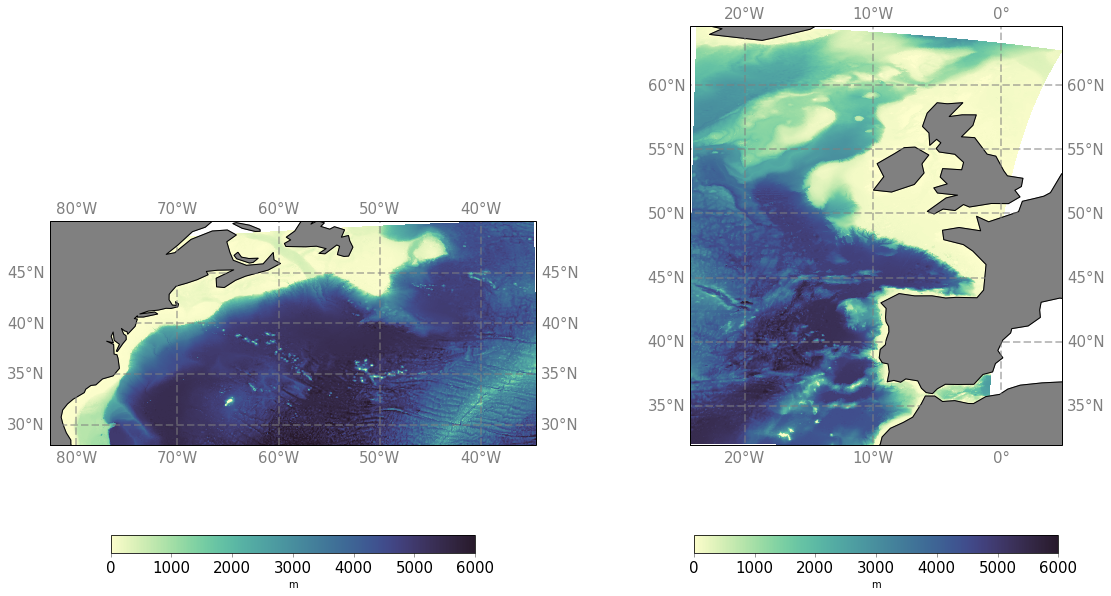

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(22,11))

ax = fig.add_subplot(121,projection=ccrs.PlateCarree(central_longitude=-30))
ax.autoscale(tight=True)
pcolor=ax.pcolormesh(navlonGS,navlatGS,bathyGS,transform=ccrs.PlateCarree(),cmap=cmocean.cm.deep,vmin=0,vmax=6000)

ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([-90,-80,-70,-60,-50,-40,-30])
gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30,35,40,45,60,75])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}

fig.subplots_adjust(right=0.8)

cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label='m')
cbar.ax.tick_params(labelsize=15,color='gray')
#ax.text(0.7, 1.55, "Bathymetry AGRIF Zooms GS & EU 1/24", va='bottom', ha='center',
#        rotation='horizontal', rotation_mode='anchor',
#        transform=ax.transAxes,fontsize=25)

ax = fig.add_subplot(122,projection=ccrs.PlateCarree(central_longitude=-30))
ax.autoscale(tight=True)
pcolor=ax.pcolormesh(navlonEU,navlatEU,bathyEU,transform=ccrs.PlateCarree(),cmap=cmocean.cm.deep,vmin=0,vmax=6000)

ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90])
gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,7075])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}

fig.subplots_adjust(right=0.8)

cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label='m')
cbar.ax.tick_params(labelsize=15,color='gray')




plt.savefig('bathys_zooms_GS-EU.png',bbox_inches='tight')

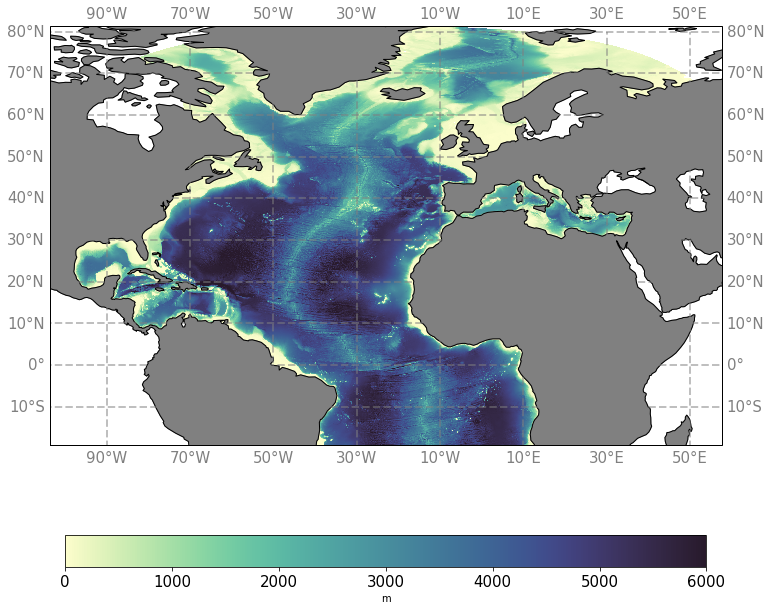

In [9]:
fig = plt.figure(figsize=(22,11))

ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
ax.autoscale(tight=True)
pcolor=ax.pcolormesh(navlon12,navlat12,bathy12,transform=ccrs.PlateCarree(),cmap=cmocean.cm.deep,vmin=0,vmax=6000)

ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([-110,-90,-70,-50,-30,-10,10,30,50,70,90,110])
gl.ylocator = mticker.FixedLocator([-20,-10,0,10,20,30,40,50,60,70,80])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}

fig.subplots_adjust(right=0.8)

cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.6,label='m')
cbar.ax.tick_params(labelsize=15)

#ax.text(0.5, 1.15, "Bathymetry NACHOS12.L75", va='bottom', ha='center',
#        rotation='horizontal', rotation_mode='anchor',
#        transform=ax.transAxes,fontsize=25)

plt.savefig('bathy_NACHOS12.png',bbox_inches='tight')